In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import (
    implementChannelLimit,
    read_csv_from_web
)
import Higgs
from Higgs import predictions as HP
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit
from scipy.interpolate import interp1d
from scipy.stats import linregress
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution

# CMS 13TeV `H>mutau` [1911.10267](https://arxiv.org/abs/1911.10267)

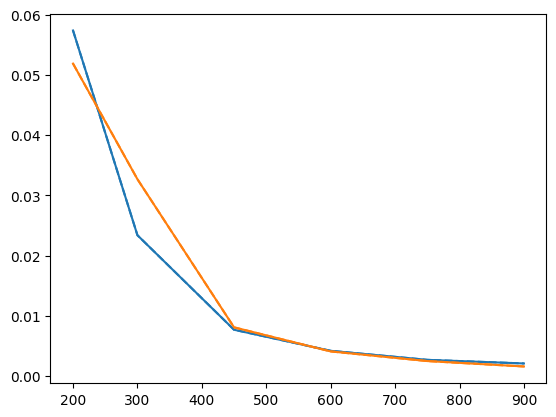

Looks good. Saving this to ggH_mutau_LHC13_CMS_36.json


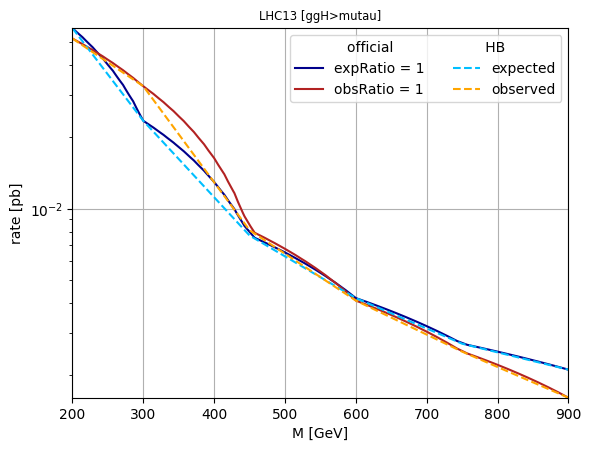

In [2]:
df = pd.DataFrame(
    data={
        "m": [200, 300, 450, 600, 750, 900],
        "obs": [51.9, 32.7, 8.1, 4.1, 2.5, 1.6],
        "exp": [57.4, 23.4, 7.7, 4.2, 2.7, 2.1],
    }
)
df.exp *= 1e-3  # pb to fb
df.obs *= 1e-3
limitFile = implementChannelLimit(
    "1911.10267",
    {"channels": [["ggH", "mutau"]]},  # b-jet veto
    "Fig. 5 (bottom)/ Tab. 5",
    df,
    collider="LHC13",
    idSuffix=1,
    massResolution=resolution.tautau["default"],
    prefix="ggH_mutau",
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)

# CMS 13TeV `H>etau` [1911.10267](https://arxiv.org/abs/1911.10267)

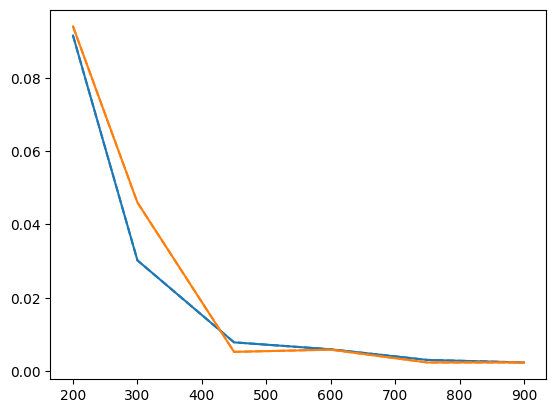

Looks good. Saving this to ggH_etau_LHC13_CMS_36.json


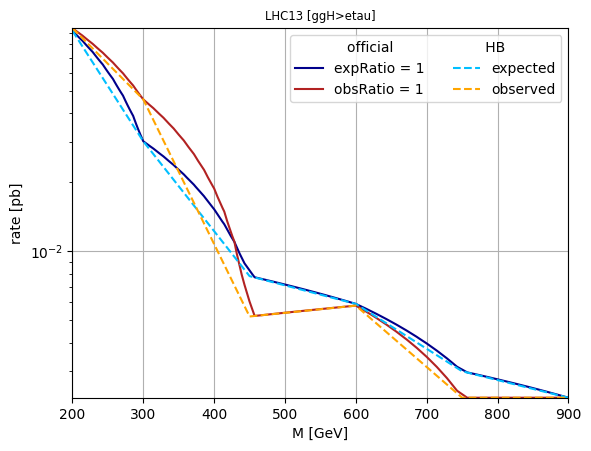

In [3]:
df = pd.DataFrame(
    data={
        "m": [200, 300, 450, 600, 750, 900],
        "obs": [94.1, 46.0, 5.2, 5.8, 2.3, 2.3],
        "exp": [91.6, 30.2, 7.8, 5.9, 3.0, 2.3],
    }
)
df.exp *= 1e-3  # pb to fb
df.obs *= 1e-3
limitFile = implementChannelLimit(
    "1911.10267",
    {"channels": [["ggH", "etau"]]},  # b-jet veto
    "Fig. 9 (bottom)/ Tab. 6",
    df,
    collider="LHC13",
    idSuffix=2,
    massResolution=resolution.tautau["default"],
    prefix="ggH_etau",
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)

# CMS 13TeV `H>emu` [1802.01122](https://arxiv.org/abs/1802.01122)

relative massresolution fit: 0.038159266072886264


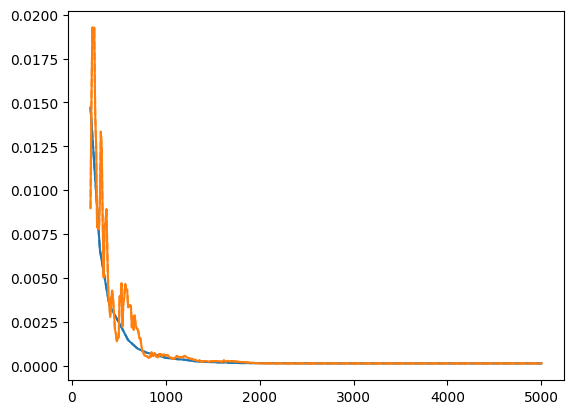

Looks good. Saving this to emu_incl_LHC13_CMS_36.json


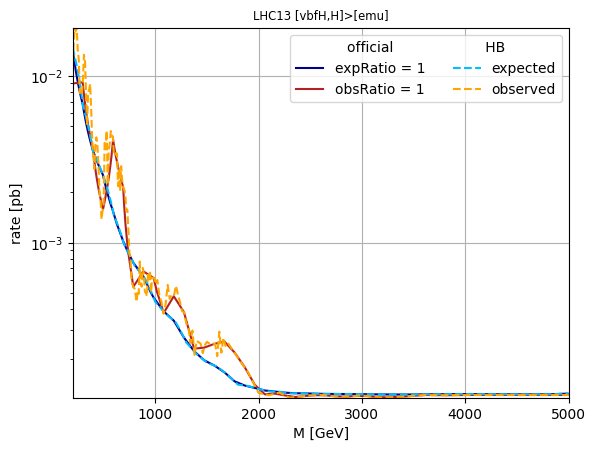

In [4]:
dfExp = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1653123/Expected%20cross%20section%20limit%20for%20tau-sneutrino%20signal/1/csv",
    comment="#",
    skiprows=8,
    names=["m", "exp"],
)

df = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1653123/Observed%20cross%20section%20limit%20for%20tau-sneutrino%20signal/1/csv",
    comment="#",
    skiprows=8,
    names=["m", "obs"],
)

# linear fit to the mass resolution of tab 2
x = np.linspace(300, 2000)
y = 1.79e-2 + 1.47e-5 * x - 3.87e-9 * x ** 2 + 4.35e-13 * x ** 3
print("relative massresolution fit:", linregress(x, x * y).slope)

# exp grid is sparser, interpolate to match
exp = interp1d(dfExp.m, dfExp.exp)
df["exp"] = exp(df.m)
df.exp *= 1e-3  # pb to fb
df.obs *= 1e-3
limitFile = implementChannelLimit(
    "1802.01122",
    {"channels": [["H", "emu"], ["vbfH", "emu"]]},
    "https://www.hepdata.net/record/ins1653123",
    df,
    massResolution={"absolute": 0.1, "relative": 4e-2},  # linear fit to Fig 8
    prefix="emu_incl",
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


# CMS 8TeV `h125 > mutau` [1502.07400](https://arxiv.org/abs/1502.07400)

In [5]:
df = pd.DataFrame({"m": [125], "obs": [1.51e-2], "exp": [0.75e-2]})
prodModes = ["ggH", "vbfH", "HZ", "HW"]  # b-jet veto
process = {"channels": [[p, "mutau"] for p in prodModes]}
limitFile = implementChannelLimit(
    "1502.07400",
    process,
    "Tab. 7",
    df,
    prefix="h125_mutau",
    massResolution={"relative": 0, "absolute": 10},  # +- 5 GeV
    normalization={
        "reference": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
    constraints={
        "modelLike": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
)
lim = HB.Limit(limitFile)
# only one datapoint, so the plot is empty and the automatic validation script
# doesn't do anything
pred = Higgs.Predictions()
h = pred.addParticle(HP.NeutralScalar("h", "even"))
h.setMass(125)
HP.effectiveCouplingInput(h, HP.smLikeEffCouplings, reference="SMHiggsInterp")
h.setBr("bb", 0)  # creates some space in the BRs
h.setBr("mutau", df.exp[0])
assert np.isclose(lim.apply(pred)[0].expRatio(), 1)
h.setBr("mutau", df.obs[0])
assert np.isclose(lim.apply(pred)[0].obsRatio(), 1)


Looks good. Saving this to h125_mutau_LHC8_CMS_20.json


# CMS 8TeV `h125 > etau` [1607.03561](https://arxiv.org/abs/1607.03561)

In [6]:
df = pd.DataFrame({"m": [125], "obs": [0.75e-2], "exp": [0.69e-2]})
prodModes = ["ggH", "vbfH", "HZ", "HW"]  # b-jet veto
process = {"channels": [[p, "etau"] for p in prodModes]}
limitFile = implementChannelLimit(
    "1607.03561",
    process,
    "Tab. 9",
    df,
    idSuffix=1,
    prefix="h125_etau",
    massResolution={"relative": 0, "absolute": 10},  # +- 5 GeV
    normalization={
        "reference": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
    constraints={
        "modelLike": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
)
lim = HB.Limit(limitFile)
# only one datapoint, so the plot is empty and the automatic validation script
# doesn't do anything
pred = Higgs.Predictions()
h = pred.addParticle(HP.NeutralScalar("h", "even"))
h.setMass(125)
HP.effectiveCouplingInput(h, HP.smLikeEffCouplings, reference="SMHiggsInterp")
h.setBr("bb", 0)  # creates some space in the BRs
h.setBr("etau", df.exp[0])
assert np.isclose(lim.apply(pred)[0].expRatio(), 1)
h.setBr("etau", df.obs[0])
assert np.isclose(lim.apply(pred)[0].obsRatio(), 1)


Looks good. Saving this to h125_etau_LHC8_CMS_20.json


# CMS 8TeV `h125 > emu` [1607.03561](https://arxiv.org/abs/1607.03561)

In [7]:
df = pd.DataFrame({"m": [125], "obs": [0.035e-2], "exp": [0.048e-2]})
prodModes = ["ggH", "vbfH", "HZ", "HW"]  # b-jet veto
process = {"channels": [[p, "emu"] for p in prodModes]}
limitFile = implementChannelLimit(
    "1607.03561",
    process,
    "p. 7",
    df,
    idSuffix=2,
    prefix="h125_emu",
    massResolution={"relative": 0, "absolute": 6},  # +- 3 GeV
    normalization={
        "reference": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
    constraints={
        "modelLike": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
)
lim = HB.Limit(limitFile)
# only one datapoint, so the plot is empty and the automatic validation script
# doesn't do anything
pred = Higgs.Predictions()
h = pred.addParticle(HP.NeutralScalar("h", "even"))
h.setMass(124)
HP.effectiveCouplingInput(h, HP.smLikeEffCouplings, reference="SMHiggsInterp")
h.setBr("bb", 0)  # creates some space in the BRs
h.setBr("emu", df.exp[0])
assert np.isclose(lim.apply(pred)[0].expRatio(), 1)
h.setBr("emu", df.obs[0])
assert np.isclose(lim.apply(pred)[0].obsRatio(), 1)


Looks good. Saving this to h125_emu_LHC8_CMS_20.json


# CMS 13TeV `h125 > mutau` [2105.03007](https://arxiv.org/abs/2105.03007)

In [8]:
df = pd.DataFrame({"m": [125], "obs": [0.15e-2], "exp": [0.15e-2]})
prodModes = ["ggH", "vbfH"]  # b-jet veto, no VH
process = {"channels": [[p, "mutau"] for p in prodModes]}
limitFile = implementChannelLimit(
    "2105.03007",
    process,
    "Tab. 6",
    df,
    prefix="h125_mutau",
    idSuffix=1,
    massResolution={"relative": 0, "absolute": 10},  # +- 5 GeV
    normalization={
        "reference": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
    constraints={
        "modelLike": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
)
lim = HB.Limit(limitFile)
# only one datapoint, so the plot is empty and the automatic validation script
# doesn't do anything
pred = Higgs.Predictions()
h = pred.addParticle(HP.NeutralScalar("h", "even"))
h.setMass(125)
HP.effectiveCouplingInput(h, HP.smLikeEffCouplings, reference="SMHiggsInterp")
h.setBr("bb", 0)  # creates some space in the BRs
h.setBr("mutau", df.exp[0])
assert np.isclose(lim.apply(pred)[0].expRatio(), 1)
h.setBr("mutau", df.obs[0])
assert np.isclose(lim.apply(pred)[0].obsRatio(), 1)


Looks good. Saving this to h125_mutau_LHC13_CMS_137.json


# CMS 13TeV `h125 > etau` [2105.03007](https://arxiv.org/abs/2105.03007)

In [9]:
df = pd.DataFrame({"m": [125], "obs": [0.22e-2], "exp": [0.16e-2]})
prodModes = ["ggH", "vbfH"]  # b-jet veto, no VH
process = {"channels": [[p, "etau"] for p in prodModes]}
limitFile = implementChannelLimit(
    "2105.03007",
    process,
    "Tab. 6",
    df,
    idSuffix=2,
    prefix="h125_etau",
    massResolution={"relative": 0, "absolute": 10},  # +- 5 GeV
    normalization={
        "reference": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
    constraints={
        "modelLike": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
)
lim = HB.Limit(limitFile)
# only one datapoint, so the plot is empty and the automatic validation script
# doesn't do anything
pred = Higgs.Predictions()
h = pred.addParticle(HP.NeutralScalar("h", "even"))
h.setMass(125)
HP.effectiveCouplingInput(h, HP.smLikeEffCouplings, reference="SMHiggsInterp")
h.setBr("bb", 0)  # creates some space in the BRs
h.setBr("etau", df.exp[0])
assert np.isclose(lim.apply(pred)[0].expRatio(), 1)
h.setBr("etau", df.obs[0])
assert np.isclose(lim.apply(pred)[0].obsRatio(), 1)


Looks good. Saving this to h125_etau_LHC13_CMS_137.json
